In [1]:
import os
import glob
import numpy as np
import pandas as pd
import geopandas as gpd

import cartopy.crs as ccrs
import cartopy.feature as cf
import scipy.stats as stats

from collections import Counter

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.gridspec as gridspec

from shapely.geometry import Point, MultiPolygon

import warnings
warnings.filterwarnings('ignore')

## Create INFO file for each year

In [2]:
year = 2024

In [3]:
dir_base = os.path.join('/','media','arturo','Arturo','Data','Brazil','OBS_CPTEC')

In [4]:
COUNTRIES = gpd.read_file(os.path.join('..','..','geometry','SA_countries.geojson'))
COUNTRIES = COUNTRIES.sort_values(by='COUNTRY', ascending=True)
COUNTRIES = COUNTRIES[(COUNTRIES.COUNTRY!='Falkland Islands (UK)')&(COUNTRIES.COUNTRY!='South Georgia and the South Sandwich Is (UK)')]
COUNTRIES = COUNTRIES.reset_index(drop=True)

In [5]:
file_list = glob.glob(os.path.join(dir_base,'1hr',str(year),'clear','*.csv'))
file_list = sorted(file_list)
file_len = len(file_list)
print(f'Number of Stations: {file_len}')

Number of Stations: 3568


In [44]:
code = []
lat, lon = [], []
for nn in range(file_len):
    data = pd.read_csv(file_list[nn])
    code.append(data.code.values[0])
    lat.append(data.lat.values[0])
    lon.append(data.lon.values[0])

INFO = pd.DataFrame({'code':code, 'lat':lat, 'lon':lon})
nameout = f'INFO_{year}.csv'
INFO.to_csv(os.path.join(dir_base,'1hr',f'{year}',nameout), header=True, index=False)

Text(1.0, 1.0, 'Total: 3483')

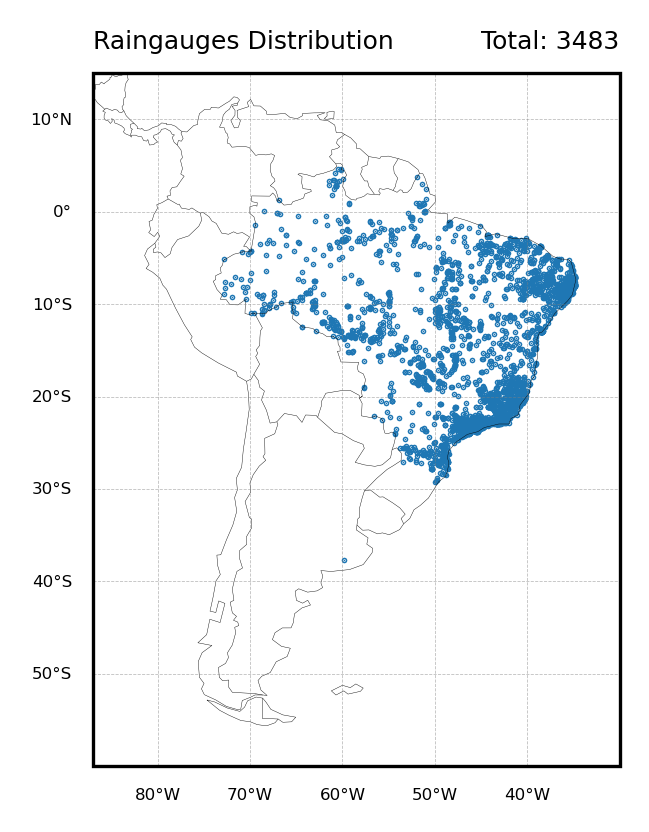

In [38]:
cmap = plt.cm.Reds
proj = ccrs.PlateCarree()

fig = plt.figure(figsize=(7,3), dpi=300)
gs = gridspec.GridSpec(1, 1)

# =====================================================================================================
ax1 = plt.subplot(gs[0, 0], projection = proj)
ax1.set_extent([-87,-30,-60,15],crs=proj)
ax1.add_feature(cf.COASTLINE,linewidth=0.1, linestyle='-',edgecolor='k')
ax1.add_feature(cf.BORDERS,linewidth=0.1, linestyle='-',edgecolor='k')

ax1.scatter(INFO['lon'],INFO['lat'],s=0.5,marker='.')

gl = ax1.gridlines(crs=proj,draw_labels=True,linewidth=0.2,color='gray',alpha=0.5,linestyle='--')
gl.top_labels = False
gl.bottom_labels = True
gl.right_labels = False
gl.left_labels =True
gl.xlabel_style = {'size': 4, 'color': 'k'}
gl.ylabel_style = {'size': 4, 'color': 'k'}

ax1.set_title('Raingauges Distribution', fontsize=6, loc='left')
ax1.set_title(f'Total: {len(INFO)}', fontsize=6, loc='right')